In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import geopandas as gpd


In [28]:
df=pd.read_csv("../clean_data/full_dataset.csv")

In [29]:
# Add a column with random percentage values (as floats from 0.00 to 1.00)
df['predicted_fair_plan'] = np.round(np.random.uniform(0, 1, size=len(df)), 2)

In [30]:
df.sample(3)

ZIP Code  Housing Units  Median Gross Rent ($)  Median Owner Cost ($)  \
1251     95833        16231.0                 1563.0                  613.0   
305      92019        15912.0                 1848.0                  744.0   
1096     95421         1240.0                 1172.0                  525.0   

      Median Home Value - Census ($)  New Policies  Renewed Policies  \
1251                        349900.0        4763.0           30849.0   
305                         576700.0        5553.0           36497.0   
1096                        571400.0         343.0            2850.0   

      Nonrenewed Policies (by Owner)  Nonrenewed Policies (by Company)  \
1251                          3819.0                             638.0   
305                           4134.0                            1449.0   
1096                           204.0                             135.0   

      Nonrenewed Policies  ...  All Disasters 10y  Fire Disasters 1y  \
1251               4457.0  ...                6.0                0.0   
305                5583.0  ...                3.0                0.0   
1096                339.0  ...               11.0                0.0   

      Fire Disasters 3y  Fire Disasters 5y  Fire Disasters 10y  \
1251                2.0                2.0                 3.0   
305                 2.0                2.0                 3.0   
1096                4.0                5.0                 6.0   

      Avg % White-only Pop  % Change White-only Pop  Avg Median Income  \
1251             53.957143                    -11.5       70791.285714   
305              64.514286                    -17.8       88256.428571   
1096             71.442857                    -10.8       61684.000000   

      % Change Median Income  predicted_fair_plan  
1251                0.513822                 0.96  
305                 0.228676                 0.60  
1096                0.483564                 0.47  

[3 rows x 51 columns]

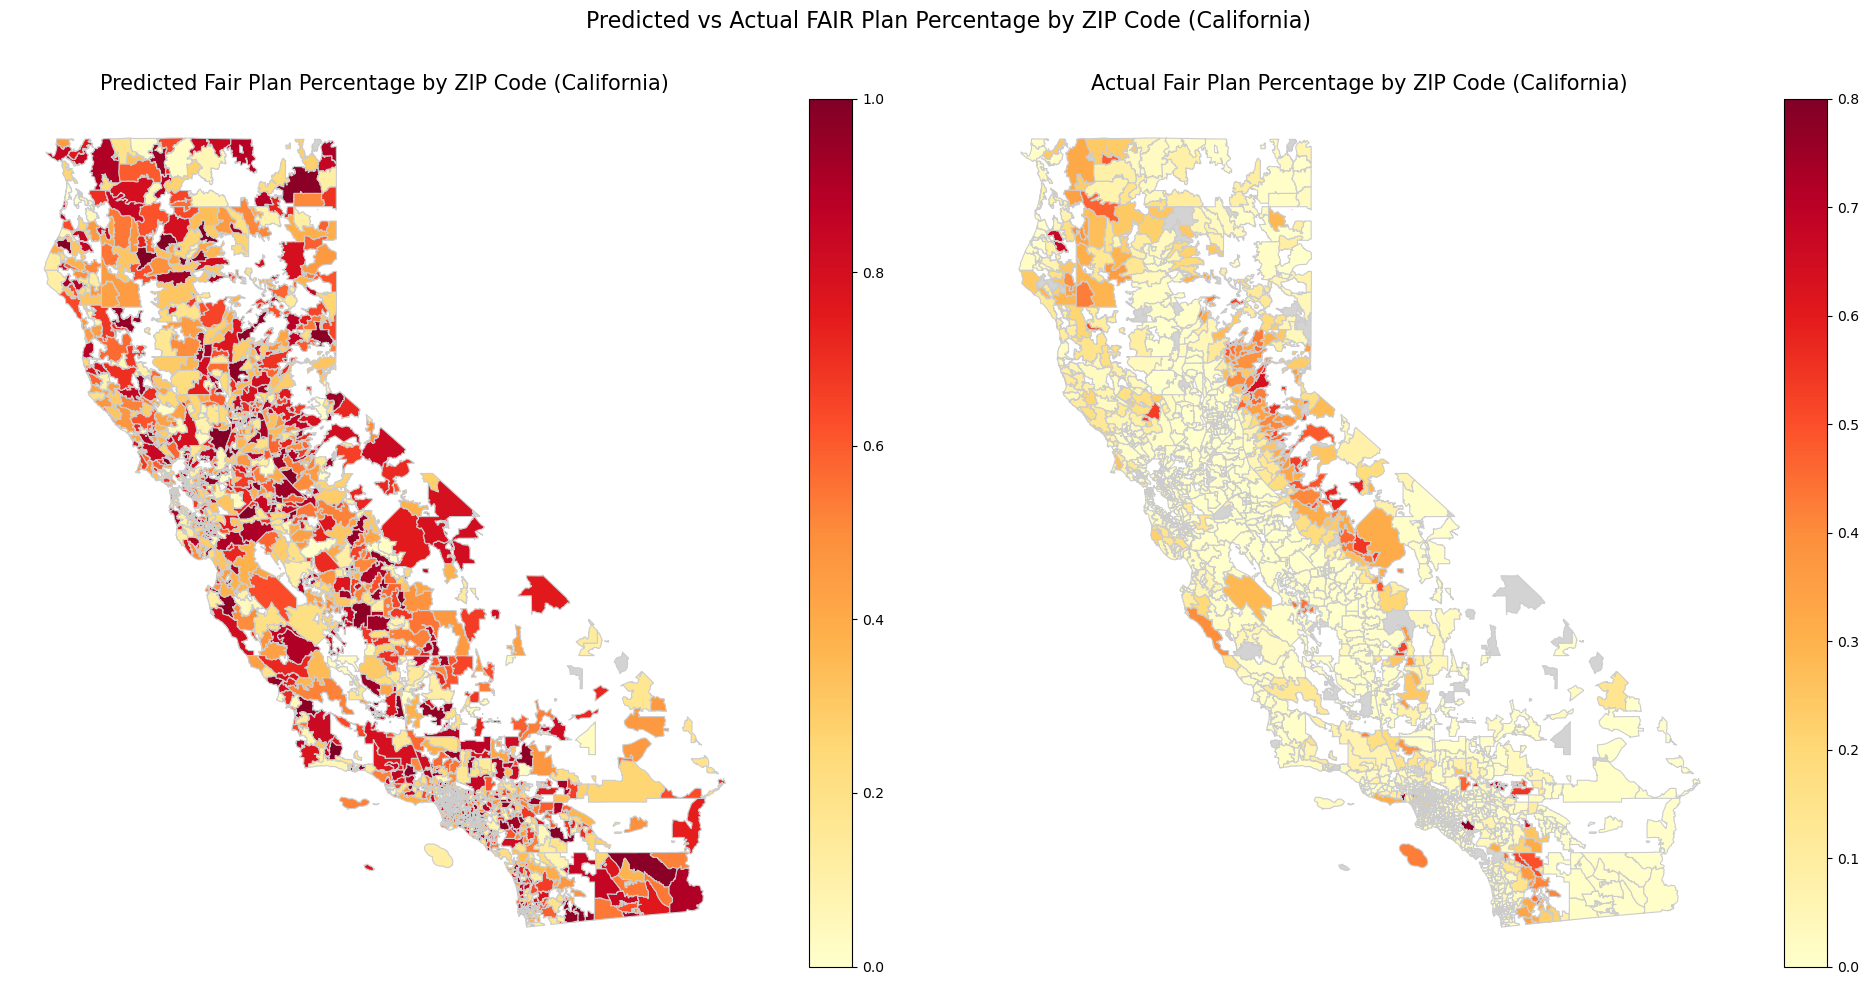

In [38]:

df["ZIP Code"] = df["ZIP Code"].astype(str).str.zfill(5)  # Ensure ZIPs are 5-digit strings

# Load ZIP code shapefile or GeoJSON
zip_geo = gpd.read_file("https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ca_california_zip_codes_geo.min.json")

# Merge your data with the shapefile
zip_geo = zip_geo.rename(columns={'ZCTA5CE10': 'ZIP Code'})
merged = zip_geo.merge(df, on="ZIP Code", how="left")

# Plot the heatmap
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged.plot(column="predicted_fair_plan",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Predicted Fair Plan Percentage by ZIP Code (California)", fontsize=15)
ax1.axis("off")

merged.plot(column="% FAIR Plan Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Fair Plan Percentage by ZIP Code (California)", fontsize=15)
ax2.axis("off")

plt.suptitle("Predicted vs Actual FAIR Plan Percentage by ZIP Code (California)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


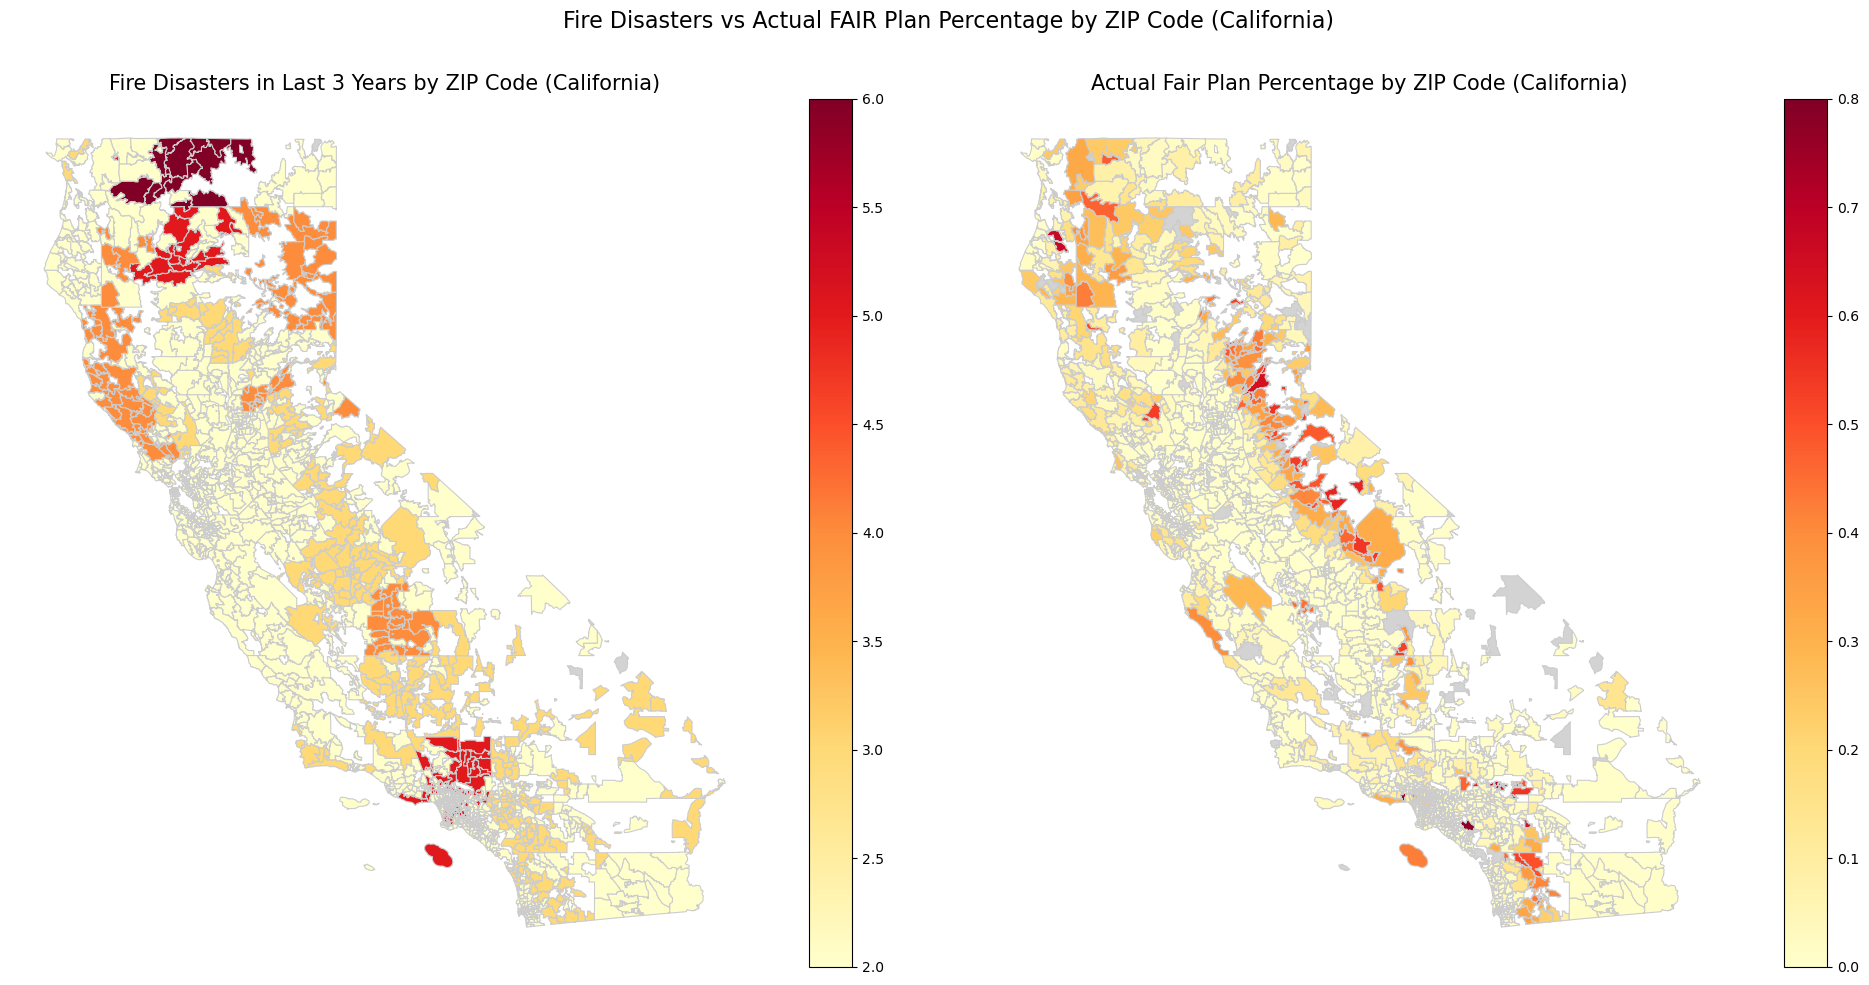

In [43]:
# Plot the heatmap
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged.plot(column="Fire Disasters 3y",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Fire Disasters in Last 3 Years by ZIP Code (California)", fontsize=15)
ax1.axis("off")

merged.plot(column="% FAIR Plan Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Fair Plan Percentage by ZIP Code (California)", fontsize=15)
ax2.axis("off")

plt.suptitle("Fire Disasters vs Actual FAIR Plan Percentage by ZIP Code (California)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()



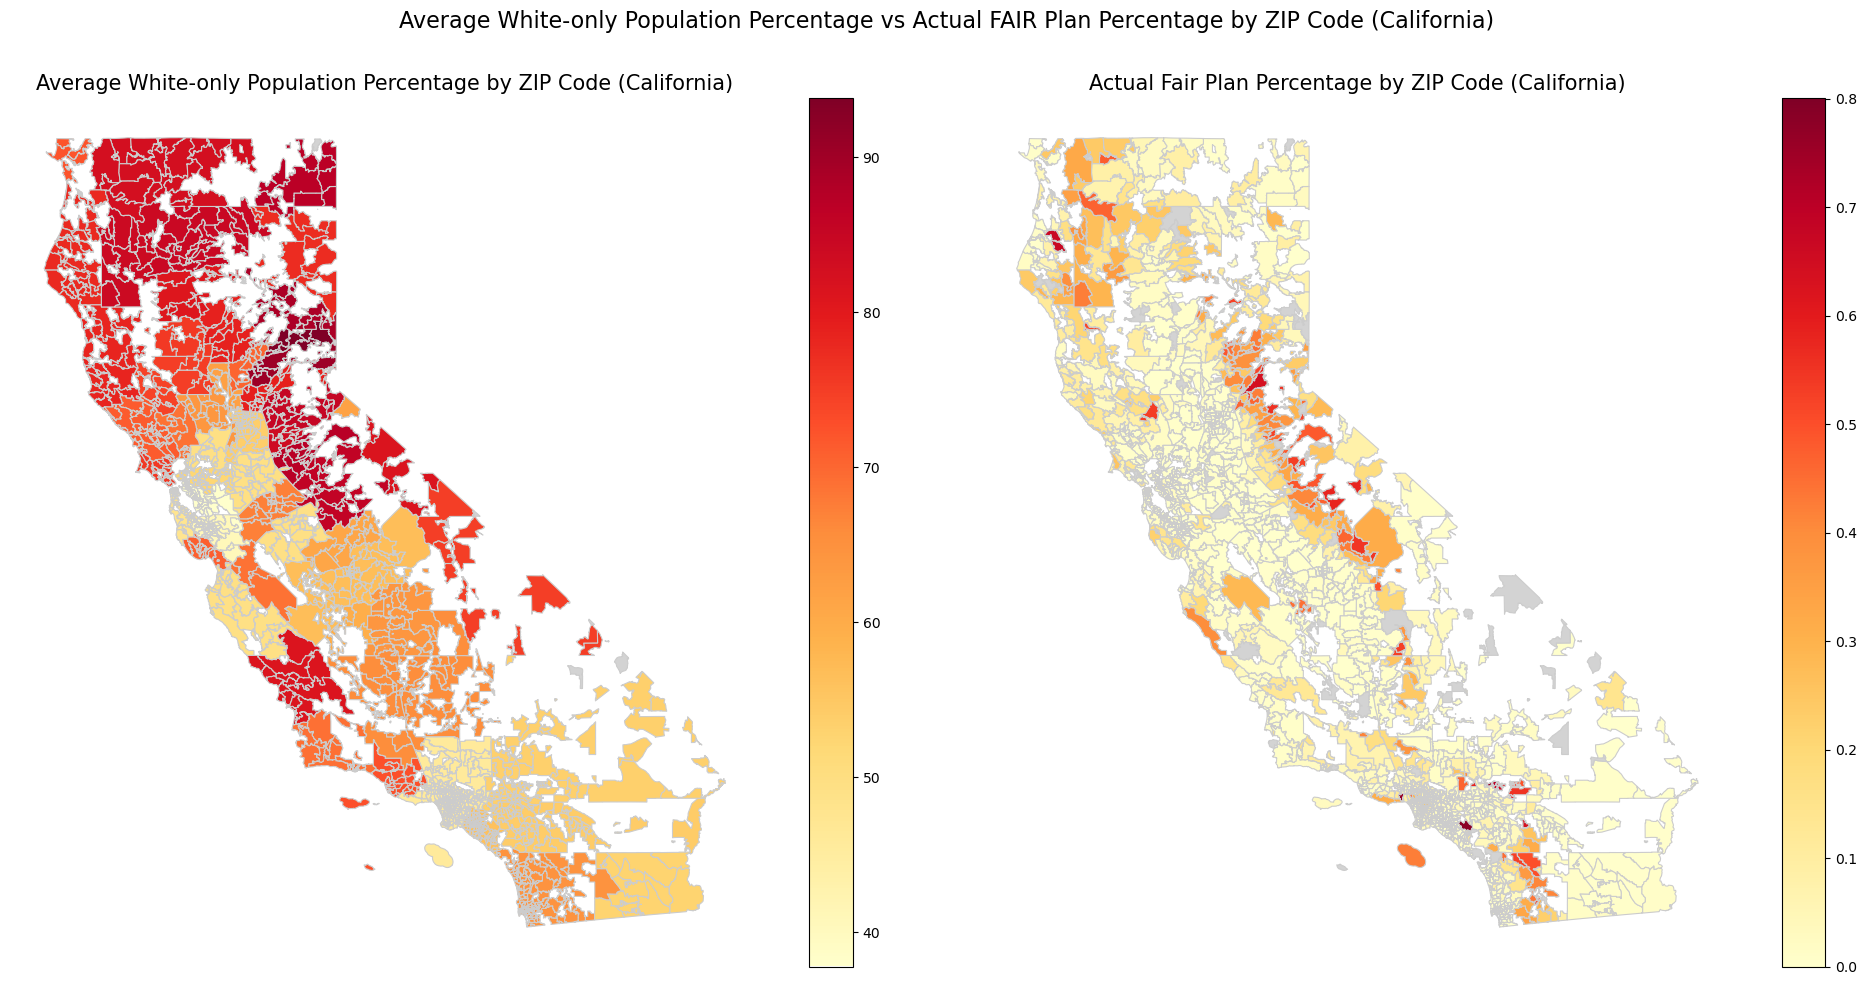

In [42]:
# Plot the heatmap
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged.plot(column="Avg % White-only Pop",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Average White-only Population Percentage by ZIP Code (California)", fontsize=15)
ax1.axis("off")

merged.plot(column="% FAIR Plan Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Fair Plan Percentage by ZIP Code (California)", fontsize=15)
ax2.axis("off")

plt.suptitle("Average White-only Population Percentage vs Actual FAIR Plan Percentage by ZIP Code (California)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()




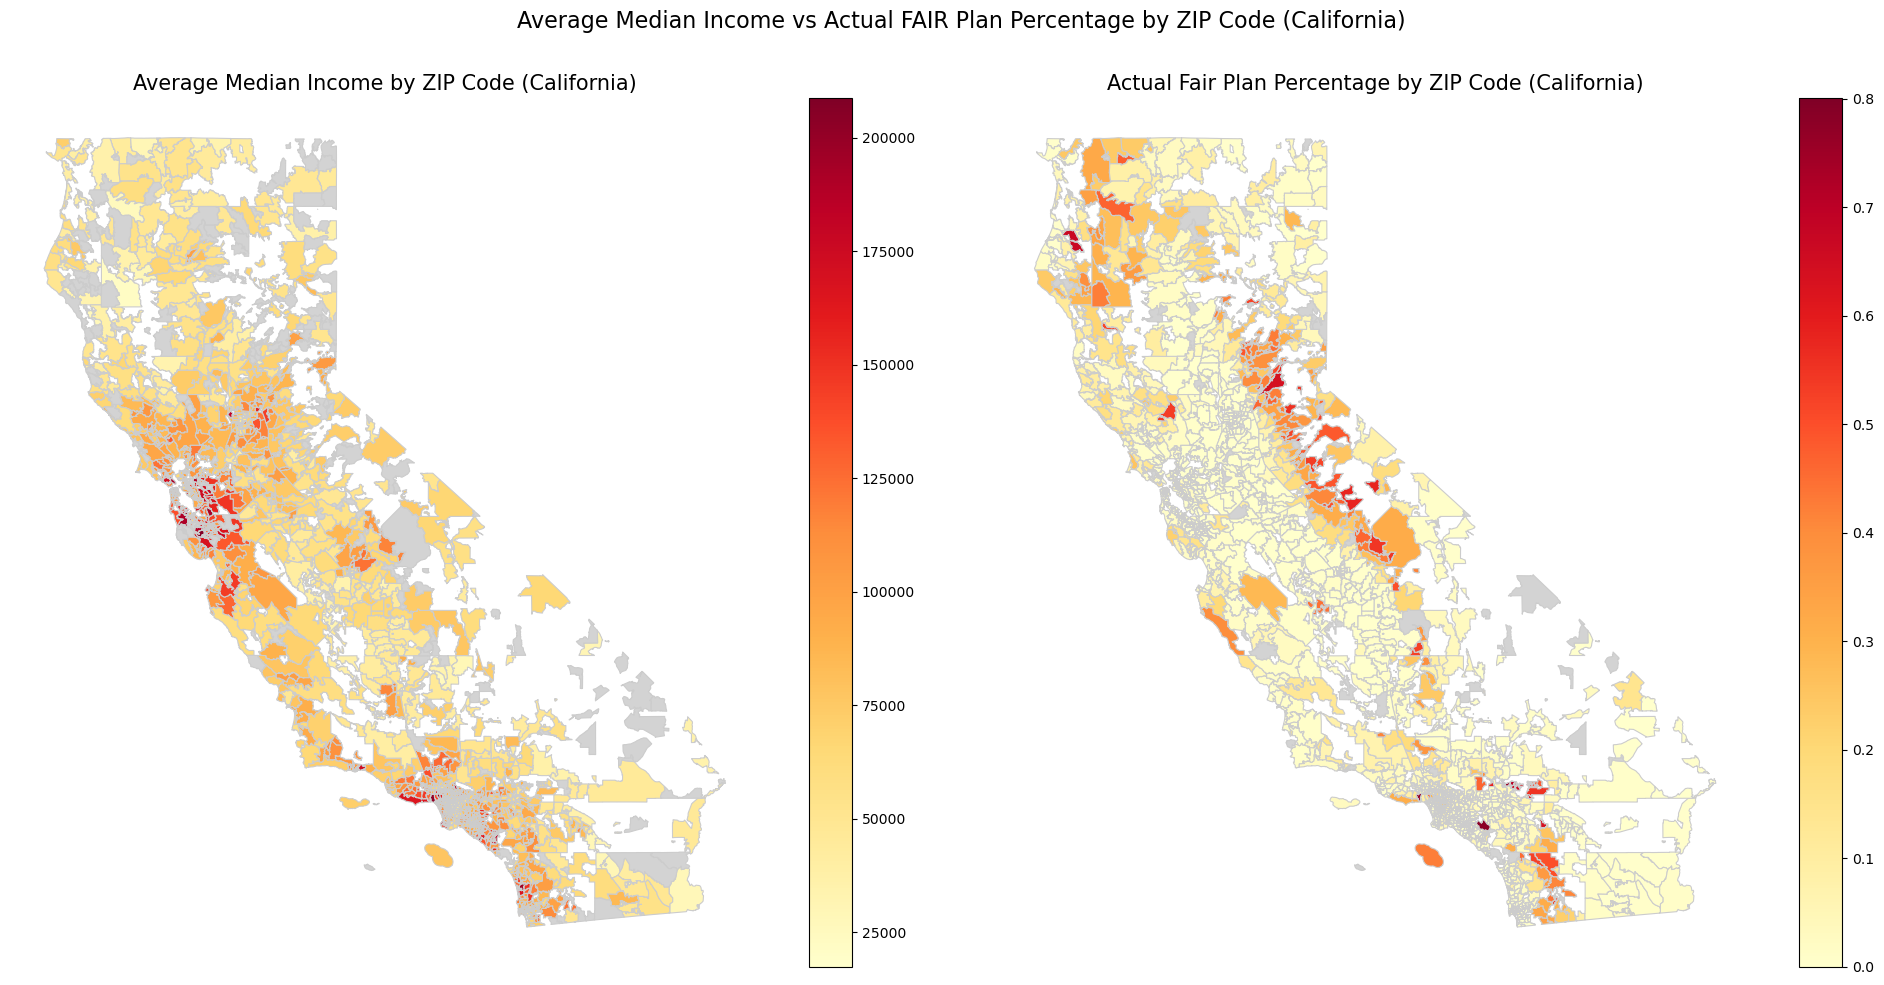

In [44]:
# Plot the heatmap
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

merged.plot(column="Avg Median Income",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Average Median Income by ZIP Code (California)", fontsize=15)
ax1.axis("off")

merged.plot(column="% FAIR Plan Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Fair Plan Percentage by ZIP Code (California)", fontsize=15)
ax2.axis("off")

plt.suptitle("Average Median Income vs Actual FAIR Plan Percentage by ZIP Code (California)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


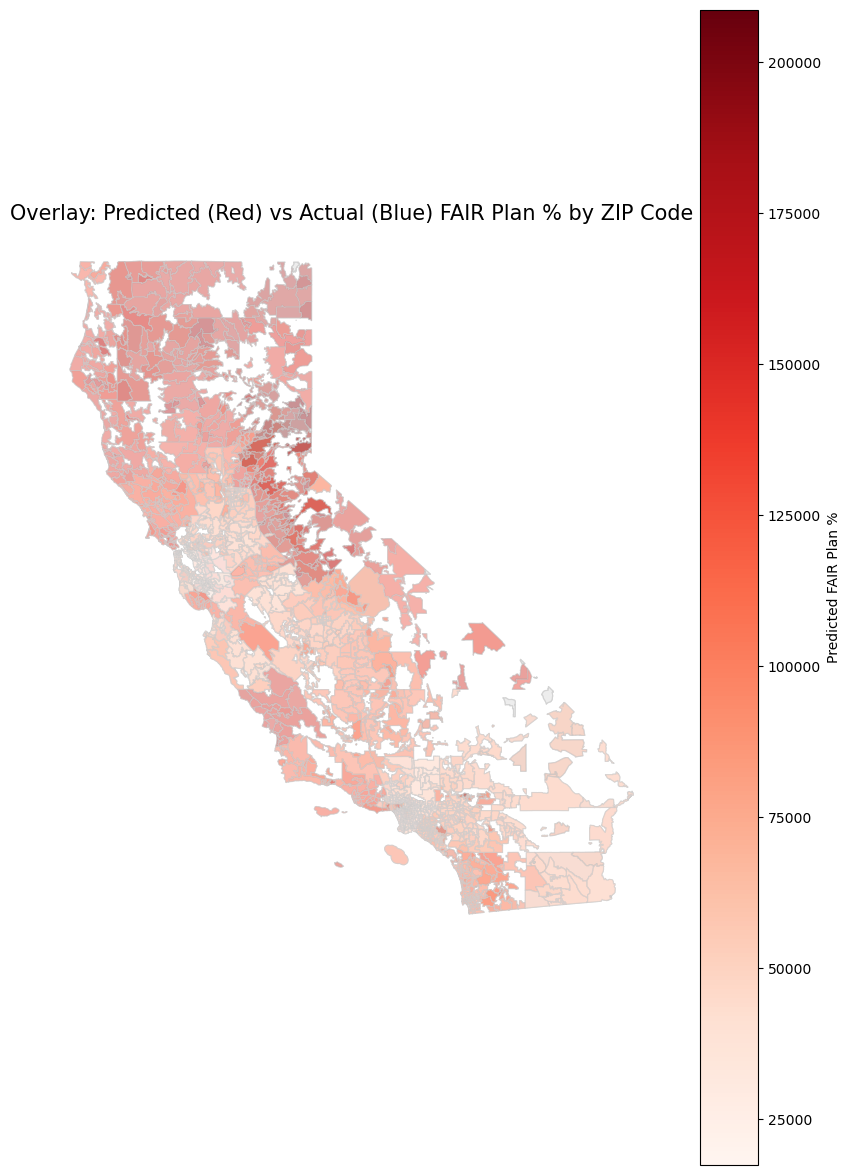

In [ ]:
'''# Plot setup
fig, ax = plt.subplots(1, 1, figsize=(10, 15))

# Plot base layer — Predicted
merged.plot(column="Avg Median Income",
            cmap="Reds",
            linewidth=0.8,
            edgecolor="0.8",
            ax=ax,
            alpha=0.4,  # Transparency so base layer shows through
            legend=True,
            legend_kwds={'label': "Predicted FAIR Plan %"},
            missing_kwds={"color": "lightgrey", "label": "No Data"})

# Overlay — Actual
merged.plot(column="% FAIR Plan Units",
            cmap="Reds",
            linewidth=0.8,
            edgecolor="0.8",
            ax=ax,
            alpha=0.4,  # Transparency so base layer shows through
            legend=False,  # Avoid double legends here
            missing_kwds={"color": "none"})

merged.plot(column="Avg % White-only Pop",
            cmap="Reds",
            linewidth=0.8,
            edgecolor="0.8",
            ax=ax,
            alpha=0.4,  # Transparency so base layer shows through
            legend=False,  # Avoid double legends here
            missing_kwds={"color": "none"})

merged.plot(column="Total Exposure ($)",
            cmap="Reds",
            linewidth=0.4,
            edgecolor="0.8",
            ax=ax,
            alpha=0.2,  # Transparency so base layer shows through
            legend=False,  # Avoid double legends here
            missing_kwds={"color": "none"})


# Final plot touches
ax.set_title("Overlay: Predicted vs Actual FAIR Plan % by ZIP Code", fontsize=15)
ax.axis("off")
plt.show()
'''

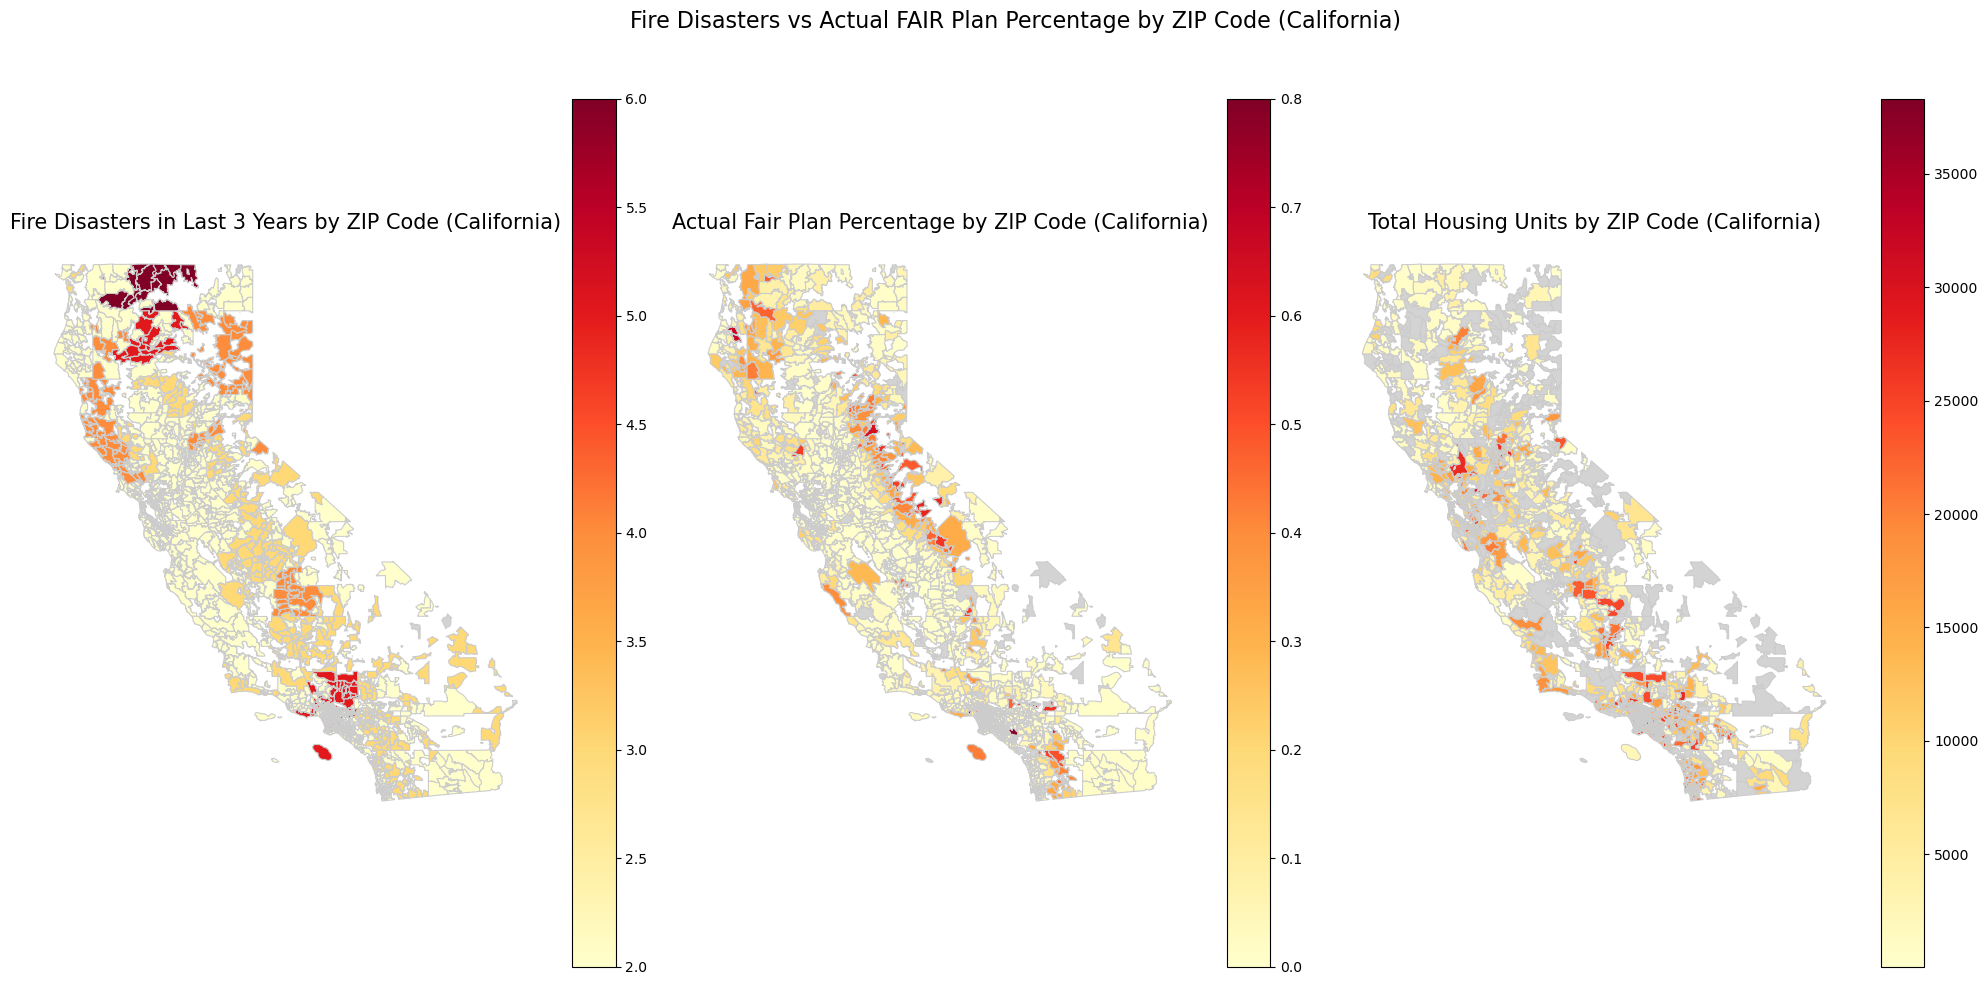

In [57]:
# Plot the heatmap
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 10))

merged.plot(column="Fire Disasters 3y",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax1,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax1.set_title("Fire Disasters in Last 3 Years by ZIP Code (California)", fontsize=15)
ax1.axis("off")

merged.plot(column="% FAIR Plan Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax2,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax2.set_title("Actual Fair Plan Percentage by ZIP Code (California)", fontsize=15)
ax2.axis("off")

merged.plot(column="Housing Units",
            cmap="YlOrRd",
            linewidth=0.8,
            edgecolor="0.8",
            legend=True,
            ax=ax3,
            missing_kwds={
                "color": "lightgrey",
                "label": "No Data"
            })

ax3.set_title("Total Housing Units by ZIP Code (California)", fontsize=15)
ax3.axis("off")

plt.suptitle("Fire Disasters vs Actual FAIR Plan Percentage by ZIP Code (California)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

